In [114]:
! cp C:\Users\amiti\Crypto_close_NFT_merge C:\Users\amiti\ape_mining\notebooks\amit

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import seaborn as sns
import talib as ta
import pyfolio as pf

# Making pandas dataframe of csv files of crypto data 

In [86]:
data_ADA = pd.read_csv('D:/ML spring 2022/instruments_modified/ADA.csv')
data_AVAX = pd.read_csv('D:/ML spring 2022/instruments_modified/AVAX.csv')
data_FLOW = pd.read_csv('D:/ML spring 2022/instruments_modified/FLOW.csv')
data_MANA = pd.read_csv('D:/ML spring 2022/instruments_modified/MANA.csv')
data_MATIC = pd.read_csv('D:/ML spring 2022/instruments_modified/MATIC.csv')
data_SOL = pd.read_csv('D:/ML spring 2022/instruments_modified/SOL.csv')
data_TFUEL = pd.read_csv('D:/ML spring 2022/instruments_modified/TFUEL.csv')

# Dropping all columns except 'close' from crypto data

In [87]:
list(data_ADA.columns)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [88]:
Col_dropped = ['Open', 'High', 'Low', 'Volume', 'Market Cap']

# ADA DATAFRAME with only close column

In [89]:
##ADA DATA

In [90]:
ADA_col_drop = data_ADA.drop(Col_dropped, axis = 1)
ADA_col_drop.columns = ADA_col_drop.columns.str.replace('Close', 'ADA_close')

# AVAX DATAFRAME with only close column

In [91]:
AVAX_col_drop = data_AVAX.drop(Col_dropped, axis = 1)
AVAX_col_drop.columns = AVAX_col_drop.columns.str.replace('Close', 'AVAX_close')

# FLOW DATAFRAME with only close column

In [92]:
FLOW_col_drop = data_FLOW.drop(Col_dropped, axis = 1)
FLOW_col_drop.columns = FLOW_col_drop.columns.str.replace('Close', 'FLOW_close')

# MANA DATAFRAME with only close column

In [93]:
MANA_col_drop = data_MANA.drop(Col_dropped, axis = 1)
MANA_col_drop.columns = MANA_col_drop.columns.str.replace('Close', 'MANA_close')


# MATIC DATAFRAME with only close column

In [94]:
MATIC_col_drop = data_MATIC.drop(Col_dropped, axis = 1)
MATIC_col_drop.columns = MATIC_col_drop.columns.str.replace('Close', 'MATIC_close')

# SOL DATAFRAME with only close column

In [95]:
SOL_col_drop = data_SOL.drop(Col_dropped, axis = 1)
SOL_col_drop.columns = SOL_col_drop.columns.str.replace('Close', 'SOL_close')

# TFUEL DATAFRAME with only close column

In [96]:
TFUEL_col_drop = data_TFUEL.drop(Col_dropped, axis = 1)
TFUEL_col_drop.columns = TFUEL_col_drop.columns.str.replace('Close', 'TFUEL_close')

# Merge different crypto close data. Seven in number, as created above

In [98]:
frames = [ADA_col_drop, AVAX_col_drop, FLOW_col_drop, MANA_col_drop, MATIC_col_drop, SOL_col_drop, TFUEL_col_drop]
df_merge_1 = pd.merge(ADA_col_drop, AVAX_col_drop, on='Date', how='left')
df_merge_2 = pd.merge(df_merge_1, FLOW_col_drop, on='Date', how='left')
df_merge_3 = pd.merge(df_merge_2, MANA_col_drop, on='Date', how='left')
df_merge_4 = pd.merge(df_merge_3, MATIC_col_drop, on='Date', how='left')
df_merge_5 = pd.merge(df_merge_4, SOL_col_drop, on='Date', how='left')
df_merge_6 = pd.merge(df_merge_5, TFUEL_col_drop, on='Date', how='left')
df = df_merge_6

# The merge DATAFRAME of seven different crypto instruments with 'close'  column information is named as df

In [99]:
df.shape

(1659, 8)

In [100]:
df.head(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close
0,2017-10-02,0.025808,1.005247,0.391781,0.004487,0.001743,0.391811,0.003589
1,2017-10-03,0.020827,0.832866,0.324598,0.003718,0.001445,0.324623,0.002974
2,2017-10-04,0.021973,0.832882,0.324604,0.003718,0.001445,0.324629,0.002974


In [101]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close
0,2017-10-02,0.025808,1.005247,0.391781,0.004487,0.001743,0.391811,0.003589
1,2017-10-03,0.020827,0.832866,0.324598,0.003718,0.001445,0.324623,0.002974
2,2017-10-04,0.021973,0.832882,0.324604,0.003718,0.001445,0.324629,0.002974


In [102]:
df.tail(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close
1656,2022-04-15,0.955461,77.3439,5.892833,2.143850,1.396289,101.3964,0.167315
1657,2022-04-16,0.951969,77.8148,5.837938,2.151203,1.389984,102.1230,0.165885
1658,2022-04-17,0.916045,75.6096,5.573768,2.050578,1.337165,100.3029,0.161584


# NFT Market-tracker data from https://nonfungible.com/market-tracker

In [103]:
data_1 = pd.read_csv('D:/ML spring 2022/NFT sales data/1_no of sale and Sale USA.csv')
data_2 = pd.read_csv('D:/ML spring 2022/NFT sales data/2 Average USD _Active market wallets.csv')
data_3 = pd.read_csv('D:/ML spring 2022/NFT sales data/3_Primary Sales_Secondary sales.csv')
data_4 = pd.read_csv('D:/ML spring 2022/NFT sales data/4_Primary sales USD _Secondary sales.csv')
data_5 = pd.read_csv('D:/ML spring 2022/NFT sales data/5_Unique buyers _Unique sellers.csv')

# NFT data downloaded in different CSV are converted into DATAFRAME and merged as one with name df_NFT

In [104]:
df_merge_NFT_1 = pd.merge(data_1, data_2, on='DateTime', how='left')
df_merge_NFT_2 = pd.merge(df_merge_NFT_1, data_3, on='DateTime', how='left')
df_merge_NFT_3 = pd.merge(df_merge_NFT_2, data_4, on='DateTime', how='left')
df_merge_NFT_4 = pd.merge(df_merge_NFT_3, data_5, on='DateTime', how='left')
df_NFT = df_merge_NFT_4
df_NFT.head(3)

,DateTime,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
0,6/22/2017 0:00,0,0.00,NaN,0,0,0,0.0,0.00,0,0
1,6/23/2017 0:00,19,1020.30,53.70,8,0,19,0.0,1020.30,8,2
2,6/24/2017 0:00,21,1240.84,59.09,17,0,21,0.0,1240.84,9,10


# Passing DateTime col of df_NFT to datetime

In [105]:
df_NFT['DateTime'] = pd.to_datetime(df_NFT['DateTime'])
df_NFT.head(3)

,DateTime,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
0,2017-06-22,0,0.00,NaN,0,0,0,0.0,0.00,0,0
1,2017-06-23,19,1020.30,53.70,8,0,19,0.0,1020.30,8,2
2,2017-06-24,21,1240.84,59.09,17,0,21,0.0,1240.84,9,10


In [106]:
df_NFT.tail(3)

,DateTime,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
1767,2022-04-23 23:59:00,15686,68755060.95,4383.21,14042,6426,9260,4105848.42,64649212.53,7963,6535
1768,2022-04-24 23:59:00,29869,47055305.26,1575.39,24157,5542,24327,3422766.45,43632538.81,13726,13367
1769,2022-04-25 23:59:00,29464,48134895.70,1633.69,23950,5548,23916,3247916.22,44886979.47,13517,13186


# Slice NFT data based on crypto DATA date records

In [107]:
start_date = '2017-10-02'
end_date = '2022-04-17'
mask = (df_NFT['DateTime'] >= start_date) & (df_NFT['DateTime'] <= end_date)
df_NFT_2 = df_NFT.loc[mask]
df_NFT_2.shape

(1659, 11)

### Changing name of "Datetime" column  to Date as in crypto dataframe

In [108]:
df_NFT_3 = df_NFT_2.rename(columns={"DateTime" : "Date"})
df_NFT_3.head(2)

,Date,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
102,2017-10-02,0,0.0,NaN,0,0,0,0.0,0.0,0,0
103,2017-10-03,0,0.0,NaN,0,0,0,0.0,0.0,0,0


# Converting to csv file
csv file conatin NFT market-tracker data

In [73]:
df_NFT_3.to_csv('NFT_markettracker.csv')

In [109]:
df_merge_Crypto_NFT = pd.merge(df, df_NFT_3, on='Date', how='left')
df_MCN = df_merge_Crypto_NFT
df_MCN.head(3)

,Date,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
0,2017-10-02,0.025808,1.005247,0.391781,0.004487,0.001743,0.391811,0.003589,0,0.00,NaN,0,0,0,0.0,0.00,0,0
1,2017-10-03,0.020827,0.832866,0.324598,0.003718,0.001445,0.324623,0.002974,0,0.00,NaN,0,0,0,0.0,0.00,0,0
2,2017-10-04,0.021973,0.832882,0.324604,0.003718,0.001445,0.324629,0.002974,1,58.61,58.61,2,0,1,0.0,58.61,1,1


# Converting to csv file
csv file conatin NFT market-tracker data plus crypto['close'] data

In [110]:
df_MCN.to_csv('cryptO_NFT_markettracker.csv')

In [111]:
df_MCN.shape

(1659, 18)

In [112]:
df_MCN.corr()

,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
ADA_close,1.000000,0.734069,0.798958,0.644238,0.835106,0.795027,0.904520,0.729735,0.756075,0.547313,0.802598,0.690943,0.741760,0.654796,0.744029,0.793765,0.783227
AVAX_close,0.734069,1.000000,0.455660,0.942393,0.883072,0.919033,0.617843,0.375708,0.644925,0.843386,0.562517,0.295402,0.442024,0.467069,0.655880,0.512749,0.568221
FLOW_close,0.798958,0.455660,1.000000,0.407892,0.499689,0.434004,0.824219,0.485605,0.468608,0.425238,0.499968,0.485276,0.468210,0.465578,0.447276,0.505800,0.473448
MANA_close,0.644238,0.942393,0.407892,1.000000,0.877869,0.860053,0.615485,0.250586,0.559979,0.853655,0.440063,0.182585,0.309205,0.398776,0.571064,0.388000,0.442019
MATIC_close,0.835106,0.883072,0.499689,0.877869,1.000000,0.888715,0.778904,0.525324,0.704181,0.738265,0.673605,0.466766,0.564508,0.545256,0.707956,0.637644,0.664954
SOL_close,0.795027,0.919033,0.434004,0.860053,0.888715,1.000000,0.659884,0.568827,0.704025,0.684327,0.728774,0.483808,0.632792,0.549233,0.706848,0.690710,0.733581
TFUEL_close,0.904520,0.617843,0.824219,0.615485,0.778904,0.659884,1.000000,0.577299,0.582892,0.512152,0.643259,0.562236,0.571241,0.542152,0.564938,0.635607,0.619486
Number of sales,0.729735,0.375708,0.485605,0.250586,0.525324,0.568827,0.577299,1.000000,0.765903,0.115758,0.955076,0.981657,0.981785,0.649318,0.756947,0.975509,0.930517
Sales USD,0.756075,0.644925,0.468608,0.559979,0.704181,0.704025,0.582892,0.765903,1.000000,0.529377,0.829840,0.710780,0.792882,0.833067,0.991723,0.818493,0.817383
Average USD,0.547313,0.843386,0.425238,0.853655,0.738265,0.684327,0.512152,0.115758,0.529377,1.000000,0.283116,0.064008,0.163086,0.382358,0.538569,0.235175,0.282701


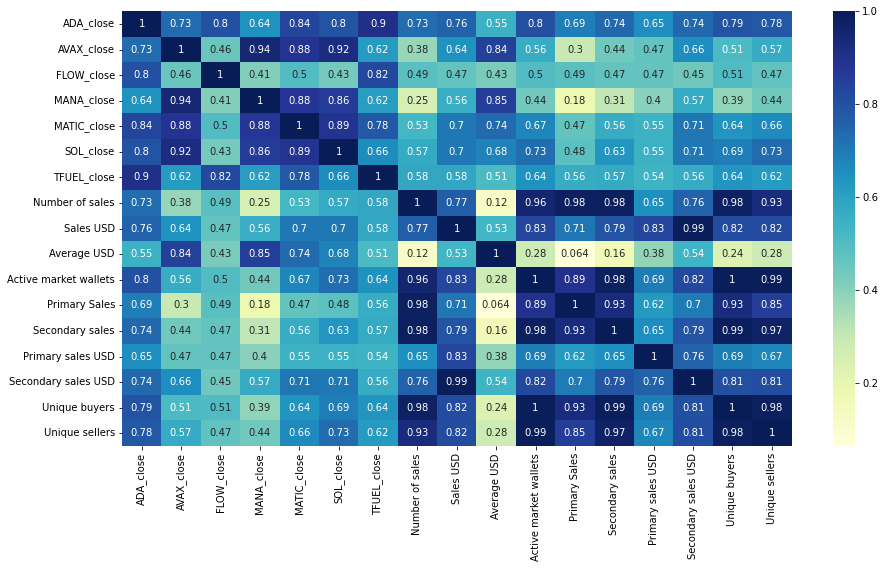

In [113]:
df_MCN.corr()
plt.figure(figsize = (15,8))
dataplot = sns.heatmap(df_MCN.corr(), cmap="YlGnBu", annot=True)
plt.show()

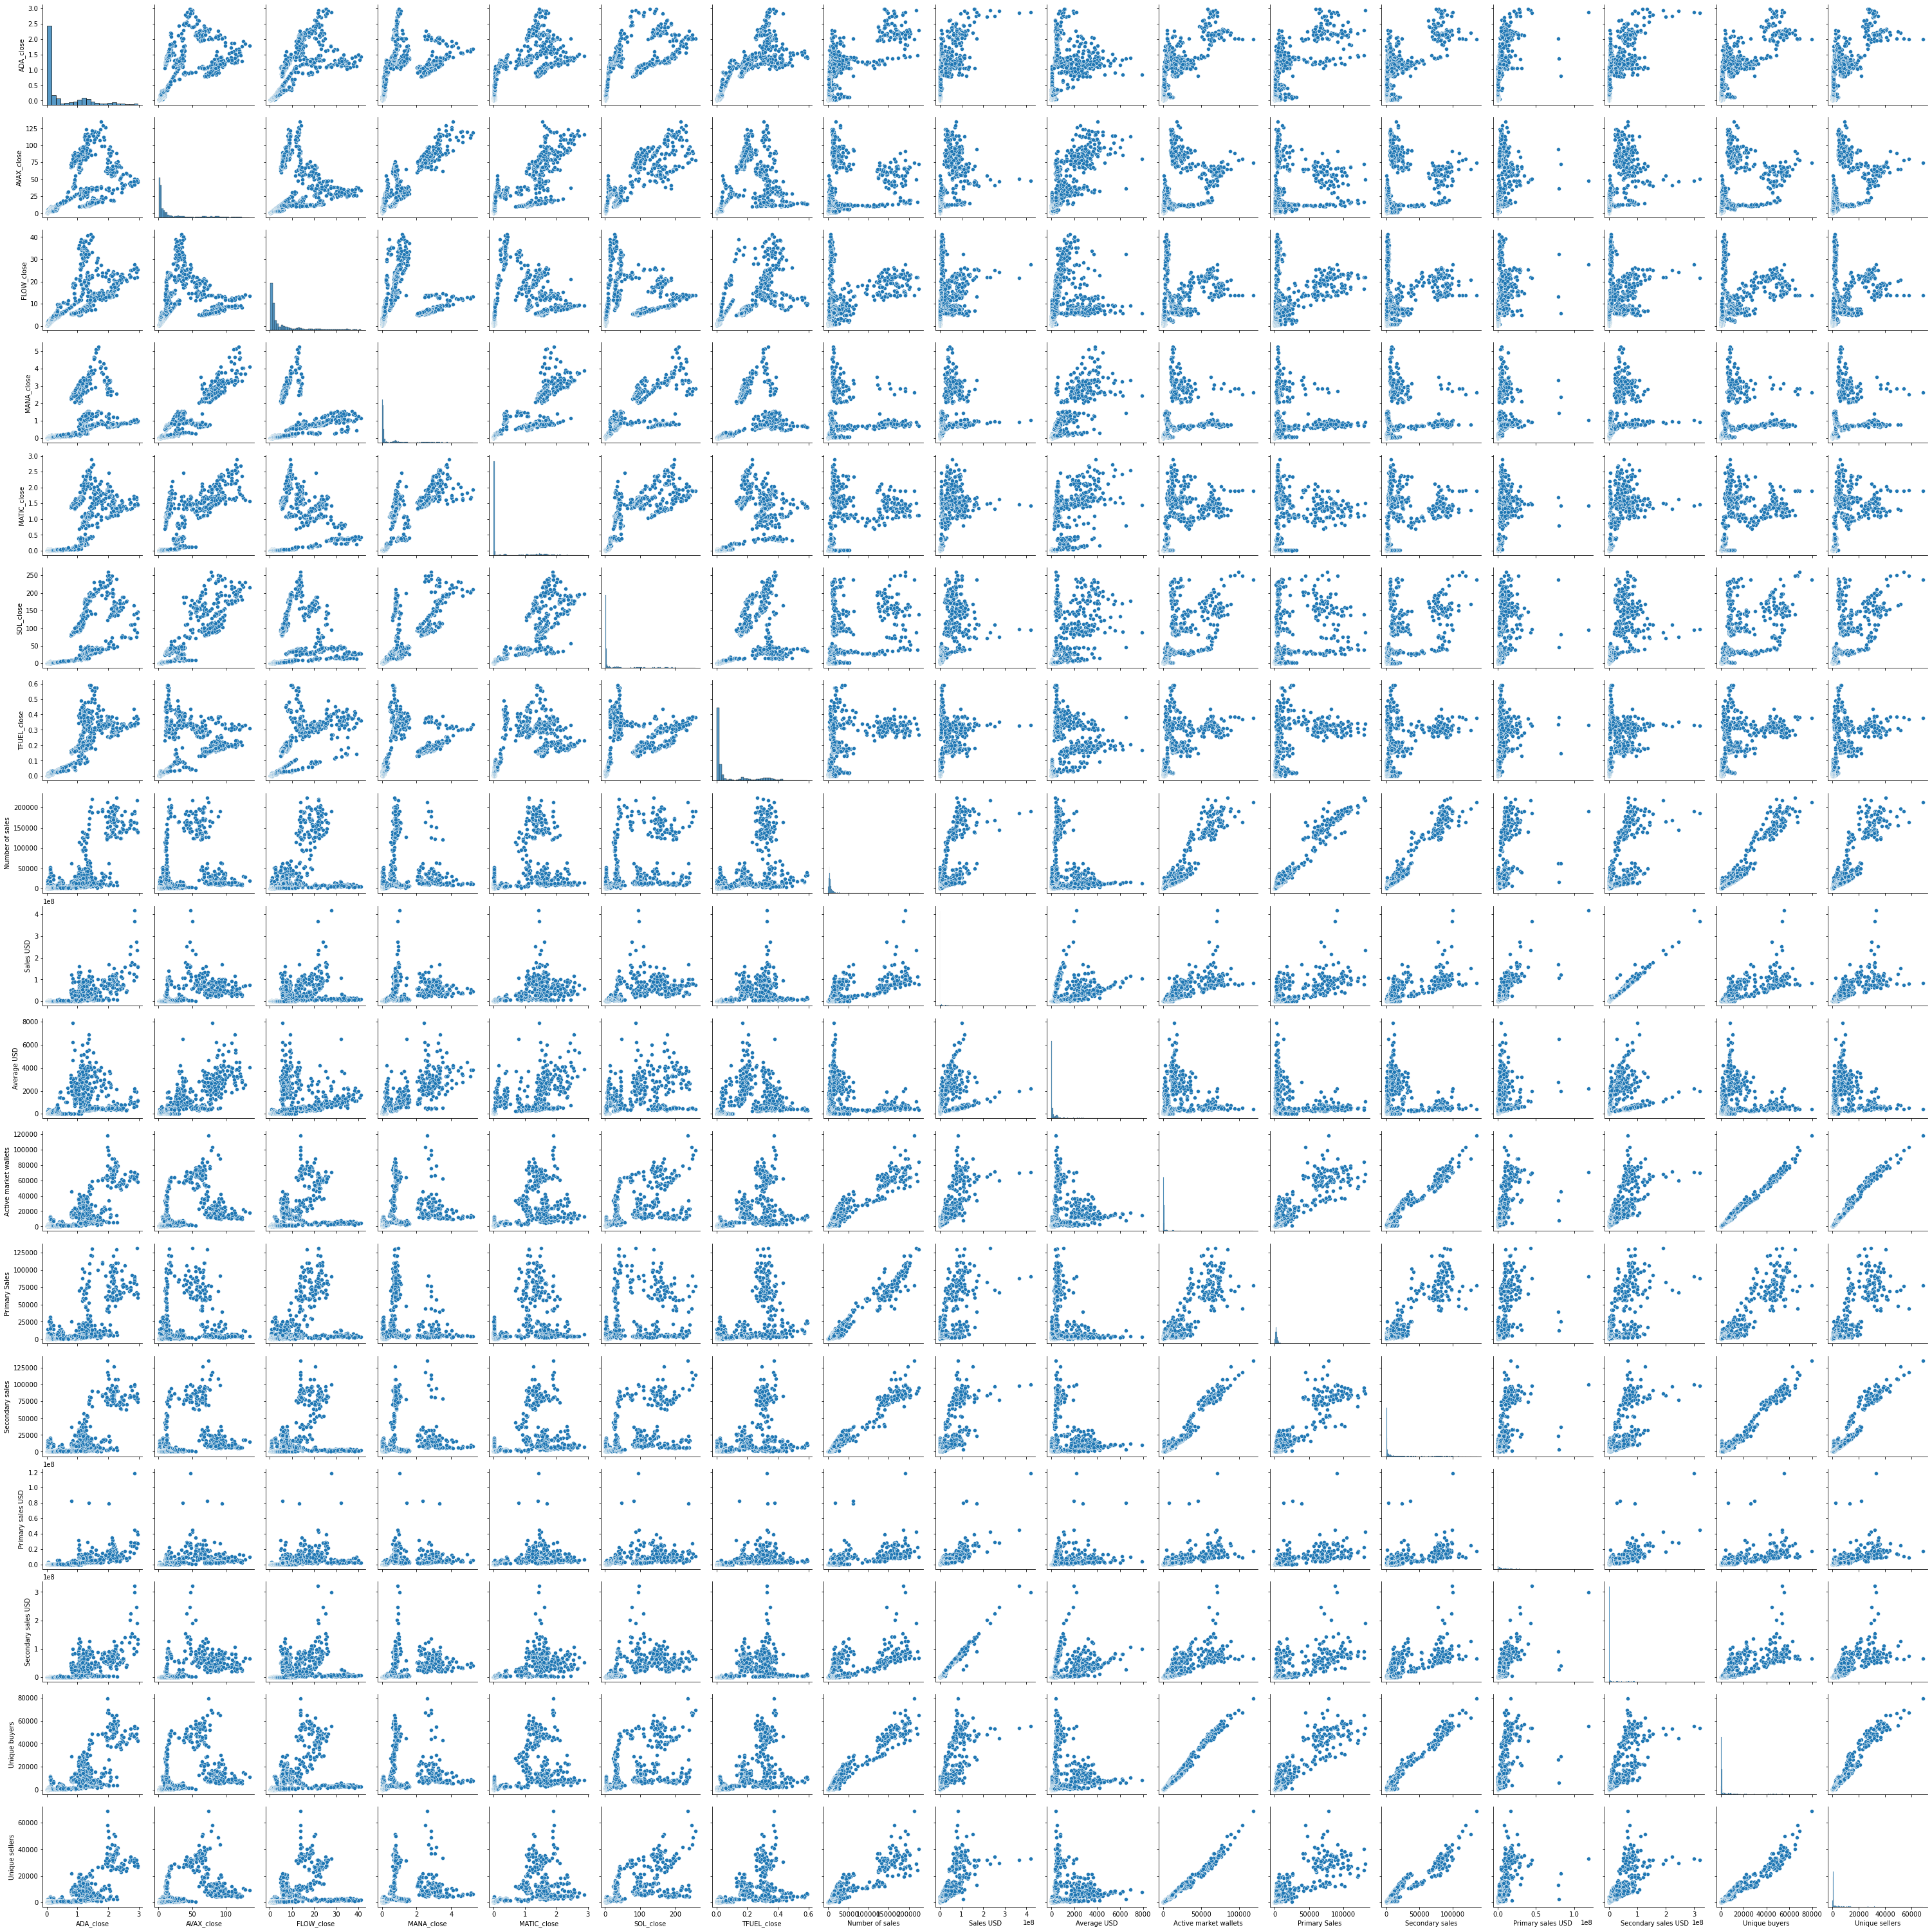

In [40]:
sns.pairplot(df_MCN)

In [41]:
start_date_2 = '2021-01-28'
end_date = '2022-04-17'
mask = (df_MCN['Date'] >= start_date_2) & (df_MCN['Date'] <= end_date)
df_MCN_2 = df_MCN.loc[mask]
df_MCN_2.shape

(445, 18)

In [42]:
df_MCN_2.corr()

,ADA_close,AVAX_close,FLOW_close,MANA_close,MATIC_close,SOL_close,TFUEL_close,Number of sales,Sales USD,Average USD,Active market wallets,Primary Sales,Secondary sales,Primary sales USD,Secondary sales USD,Unique buyers,Unique sellers
ADA_close,1.000000,0.040087,0.267654,-0.123199,0.300216,0.451615,0.501741,0.707611,0.558638,-0.314163,0.695025,0.667425,0.714584,0.463454,0.539194,0.715526,0.674184
AVAX_close,0.040087,1.000000,-0.508916,0.872328,0.666763,0.817143,-0.343538,-0.107203,0.289885,0.667472,0.100173,-0.209312,0.003178,0.061106,0.324989,0.030236,0.143280
FLOW_close,0.267654,-0.508916,1.000000,-0.483717,-0.601983,-0.400126,0.408210,0.112145,-0.097790,-0.329046,-0.041355,0.161427,0.055931,0.056920,-0.129165,0.012158,-0.064174
MANA_close,-0.123199,0.872328,-0.483717,1.000000,0.688244,0.681053,-0.191536,-0.291950,0.141631,0.690337,-0.108422,-0.361265,-0.206359,-0.033255,0.174682,-0.173187,-0.073892
MATIC_close,0.300216,0.666763,-0.601983,0.688244,1.000000,0.727652,0.048085,0.128844,0.372273,0.352254,0.281635,0.059172,0.194336,0.159137,0.397031,0.235022,0.295114
SOL_close,0.451615,0.817143,-0.400126,0.681053,0.727652,1.000000,-0.022447,0.291136,0.432460,0.329716,0.476808,0.179613,0.391841,0.244480,0.446203,0.425101,0.503537
TFUEL_close,0.501741,-0.343538,0.408210,-0.191536,0.048085,-0.022447,1.000000,0.244422,0.010874,-0.386553,0.173636,0.278078,0.197870,0.130089,-0.020005,0.207383,0.150949
Number of sales,0.707611,-0.107203,0.112145,-0.291950,0.128844,0.291136,0.244422,1.000000,0.649357,-0.464046,0.945664,0.976746,0.975314,0.499674,0.636591,0.972734,0.904501
Sales USD,0.558638,0.289885,-0.097790,0.141631,0.372273,0.432460,0.010874,0.649357,1.000000,0.125982,0.704479,0.584258,0.684823,0.747443,0.985895,0.693831,0.688842
Average USD,-0.314163,0.667472,-0.329046,0.690337,0.352254,0.329716,-0.386553,-0.464046,0.125982,1.000000,-0.347216,-0.499069,-0.405405,-0.020452,0.153081,-0.395902,-0.315229


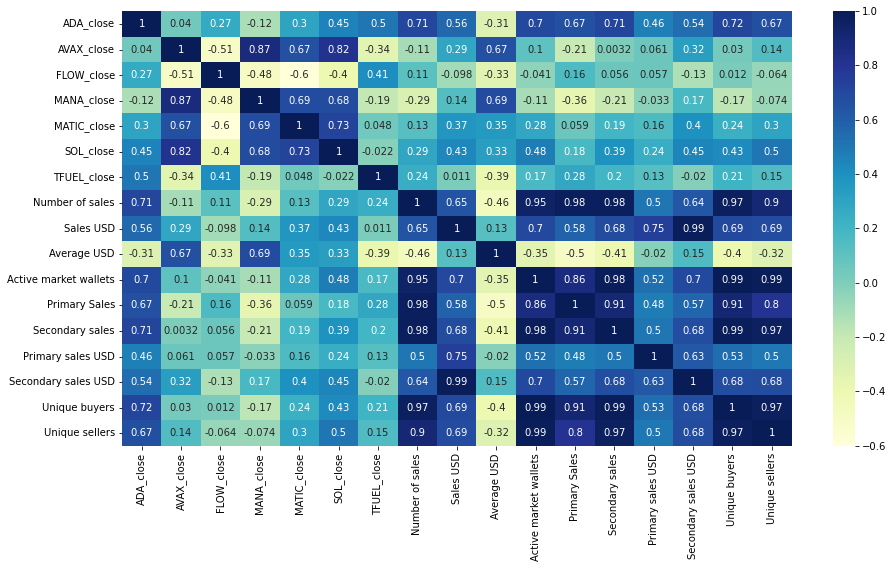

In [43]:
df_MCN_2.corr()
plt.figure(figsize = (15,8))
dataplot = sns.heatmap(df_MCN_2.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [44]:
#df_merge_Crypto_NFT = pd.merge(df, df_NFT_3, on='Date', how='left')
#df_MCN = df_merge_Crypto_NFT
#df_MCN.head(3)

In [45]:
#df_merge_Crypto_NFT_shift = pd.merge(df, df_NFT_shift, on='Date', how='left')
#df_MCN = df_merge_Crypto_NFT_shift
#df_MCN_shift

In [59]:
df_MCN["Primary Sales_rolling average"] = df_MCN['Primary Sales'].rolling(window = 50).mean()
df_MCN["Sales USD_rolling average"] = df_MCN['Sales USD'].rolling(window = 50).mean()
df_MCN["Active market wallets_rolling average"] = df_MCN['Active market wallets'].rolling(window = 50).mean()
df_MCN["Unique buyers_rolling average"] = df_MCN['Unique buyers'].rolling(window = 50).mean()
#df_MCN["Primary Sales_pct"] = df_MCN['Primary Sales'].pct_change()
#df_MCN["Number of sales_pct"] = df_MCN['Number of sales'].pct_change()
#df_MCN["ADA_close_pct"] = df_MCN['ADA_close'].pct_change()
#df_MCN.tail(5)

In [60]:
print(df_MCN['ADA_close'].corr(df_MCN['Number of sales']))

0.7297345496680204


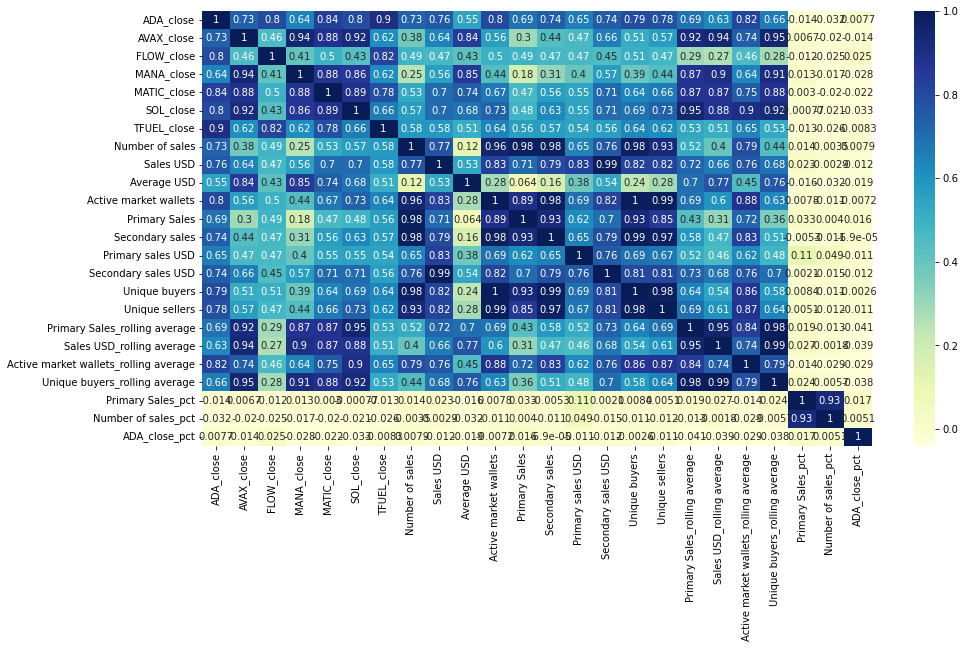

In [55]:
df_MCN.corr()
plt.figure(figsize = (15,8))
dataplot = sns.heatmap(df_MCN.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [62]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
from sklearn.linear_model import LinearRegression